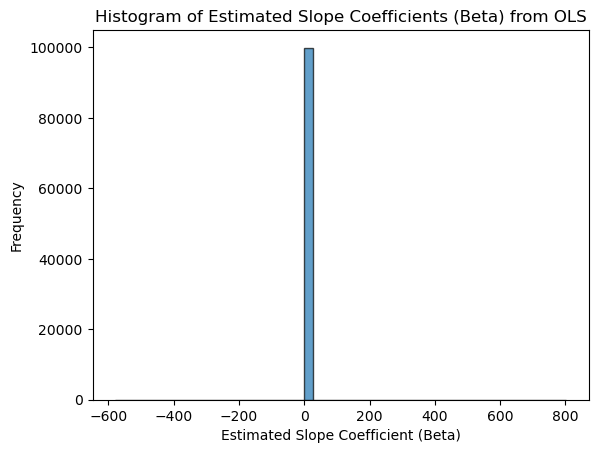

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.stats import cauchy

# Set seed for reproducibility
np.random.seed(0)

# Parameters
nsim = 100000  # Number of simulations
n = 100  # Sample size

# Generate x once, to be used in all simulations
x = np.random.uniform(-100, 100, n)
# Add constant to x for the intercept term
X = sm.add_constant(x)

# Store estimated coefficients for beta (slope)
beta_estimates = []

for _ in range(nsim):
    # Generate error term from Cauchy distribution
    e = cauchy.rvs(size=n)
    # Generate y based on the specified DGP
    y = 5 + 10*x + e
    # Estimate the OLS model
    model = sm.OLS(y, X).fit()
    # Append the estimated slope coefficient
    beta_estimates.append(model.params[1])

# Plot the histogram of estimated slope coefficients
plt.hist(beta_estimates, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Estimated Slope Coefficient (Beta)')
plt.ylabel('Frequency')
plt.title('Histogram of Estimated Slope Coefficients (Beta) from OLS')

plt.show()
